In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataframe = pd.read_csv('Zomato_data.csv')
print(dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [32]:
#"Changing the data type of rate to float and removing the "

In [3]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0];
    return float(value)

In [4]:
dataframe['rate'] = dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [ ]:
# Here we'll see the count of different categories of restaurants

C:\Users\saksh\AppData\Local\Temp\ipykernel_26308\3858894964.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe['listed_in(type)'], palette = 'Set2')


Text(0.5, 0, 'Type of Restaurant')

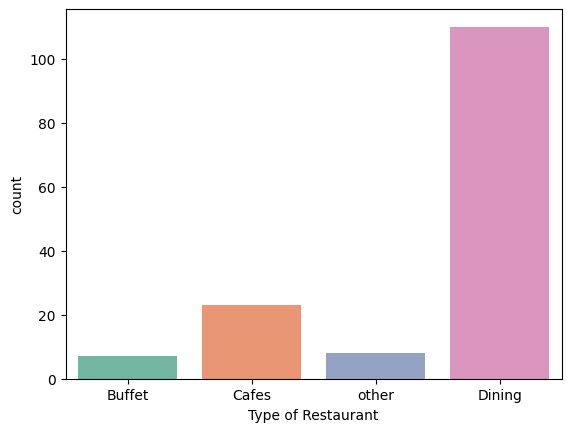

In [6]:
sns.countplot(x=dataframe['listed_in(type)'], palette = 'Set2')
plt.xlabel("Type of Restaurant")

In [ ]:
# The majority of restaurants falls under dining category

In [ ]:
# We'll check, which type of restaurant is mostly preferred

Text(0, 0.5, 'Votes')

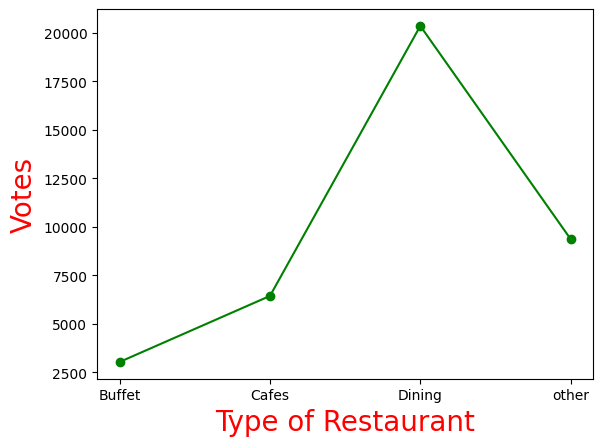

In [7]:
groupedData = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': groupedData})
plt.plot(result, c = 'green', marker = 'o')
plt.xlabel("Type of Restaurant", c = 'red', size = 20)
plt.ylabel("Votes", c = 'red', size = 20)

In [ ]:
# Dining restaurants are preferred by a larger number of individuals

In [ ]:
# Which restaurant's name received maximum votes

In [12]:
max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']

print("Restaurant(s) with maximum votes: ")
print(restaurant_with_max_votes)

Restaurant(s) with maximum votes: 
38    Empire Restaurant
Name: name, dtype: object


In [ ]:
# Empire Restaurant received maximum votes (i.e. 38)

In [ ]:
# What type of orders does maximum restaurants accepts?

C:\Users\saksh\AppData\Local\Temp\ipykernel_26308\4118114237.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe['online_order'], palette = 'Set2')


<Axes: xlabel='online_order', ylabel='count'>

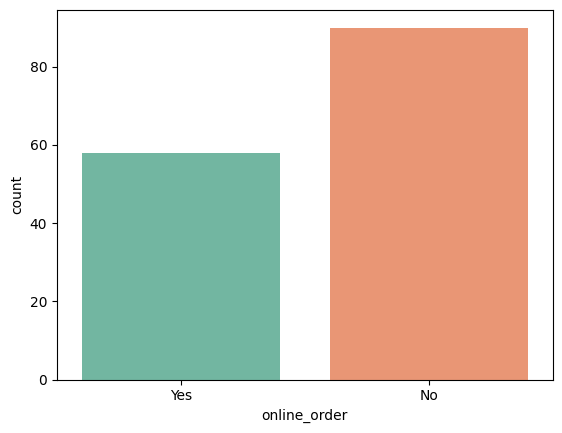

In [18]:
sns.countplot(x=dataframe['online_order'], palette = 'Set2')

In [ ]:
# The majority of restaurants does not accept online orders

In [ ]:
# Ratings received by majority of restaurants

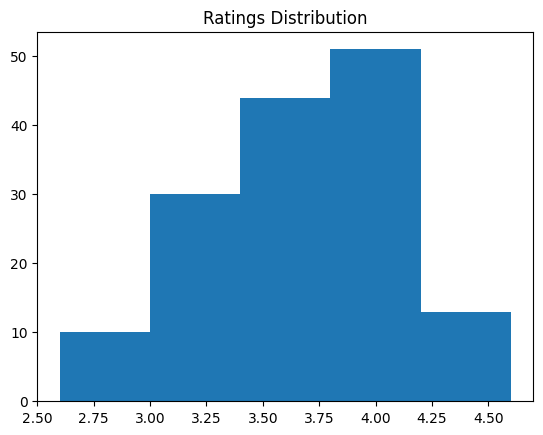

In [19]:
plt.hist(dataframe['rate'], bins = 5)
plt.title("Ratings Distribution")
plt.show()


In [ ]:
# The majority of restaurants received ratings ranging between 3.5 and 4

In [ ]:
# Let's check the approximate cost for 2 peoples in majority of restaurants

C:\Users\saksh\AppData\Local\Temp\ipykernel_26308\4237012102.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = couple_data, palette='Set1')


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

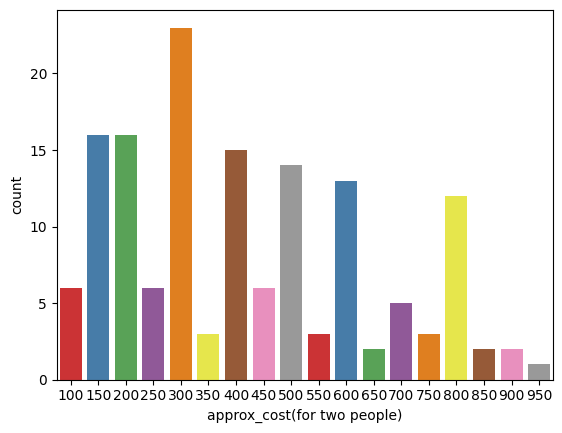

In [22]:
couple_data = dataframe['approx_cost(for two people)']
sns.countplot(x = couple_data, palette='Set1')

In [ ]:
# Approximate cost for 2 peoples in majority of restaurants is 300

In [ ]:
# Which type of orders received maximum ratings?

<Axes: xlabel='online_order', ylabel='rate'>

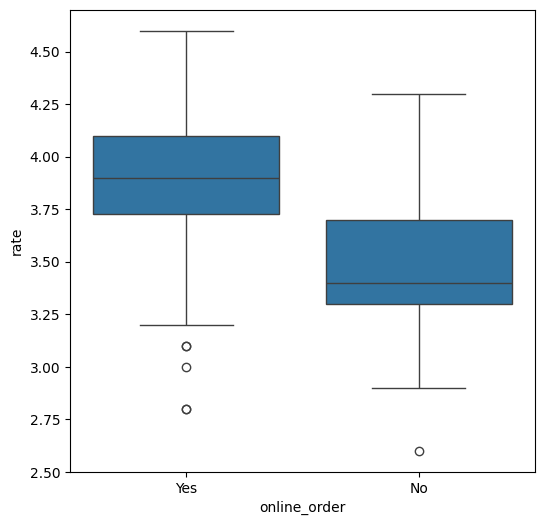

In [23]:
plt.figure(figsize= (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)

In [ ]:
# Offline orders received lower ratings in comparison to online orders

In [ ]:
# Type of restaurants vs type of orders

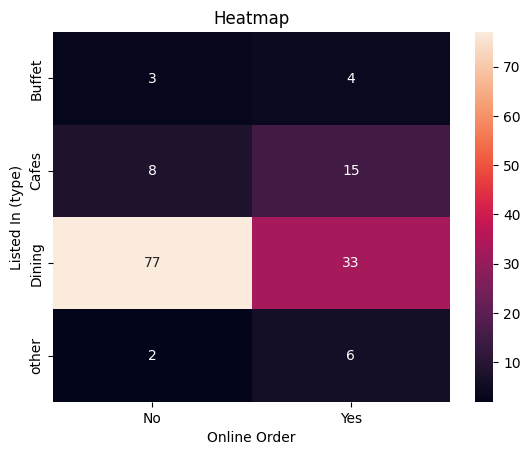

In [29]:
pivot_table = dataframe.pivot_table(index = 'listed_in(type)', columns = 'online_order', aggfunc = 'size', fill_value=0)
sns.heatmap(pivot_table, annot=True, fmt = 'd')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (type)")
plt.show()

In [ ]:
# Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. 
#This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.